<a href="https://colab.research.google.com/github/leloc0609/BK-INNO-GUI/blob/master/LeNet_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import *

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [5]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [6]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [7]:
print(x_train.shape)

(58000, 32, 32, 1)


In [29]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5,5), padding='same', activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(16, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 6)         156       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 576)               0         
                                                                 
 dense_27 (Dense)            (None, 120)              

In [20]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
907/907 [==============================] - 14s 4ms/step - loss: 0.2172 - accuracy: 0.9346 - val_loss: 0.0765 - val_accuracy: 0.9810
Epoch 2/10
907/907 [==============================] - 4s 5ms/step - loss: 0.0687 - accuracy: 0.9787 - val_loss: 0.0578 - val_accuracy: 0.9845
Epoch 3/10
907/907 [==============================] - 4s 4ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0514 - val_accuracy: 0.9870
Epoch 4/10
907/907 [==============================] - 4s 4ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 0.0507 - val_accuracy: 0.9900
Epoch 5/10
907/907 [==============================] - 4s 5ms/step - loss: 0.0295 - accuracy: 0.9903 - val_loss: 0.0459 - val_accuracy: 0.9890
Epoch 6/10
907/907 [==============================] - 4s 4ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0448 - val_accuracy: 0.9895
Epoch 7/10
907/907 [==============================] - 4s 4ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.0447 - val_accuracy: 0.9915
Epoch

TypeError: ignored

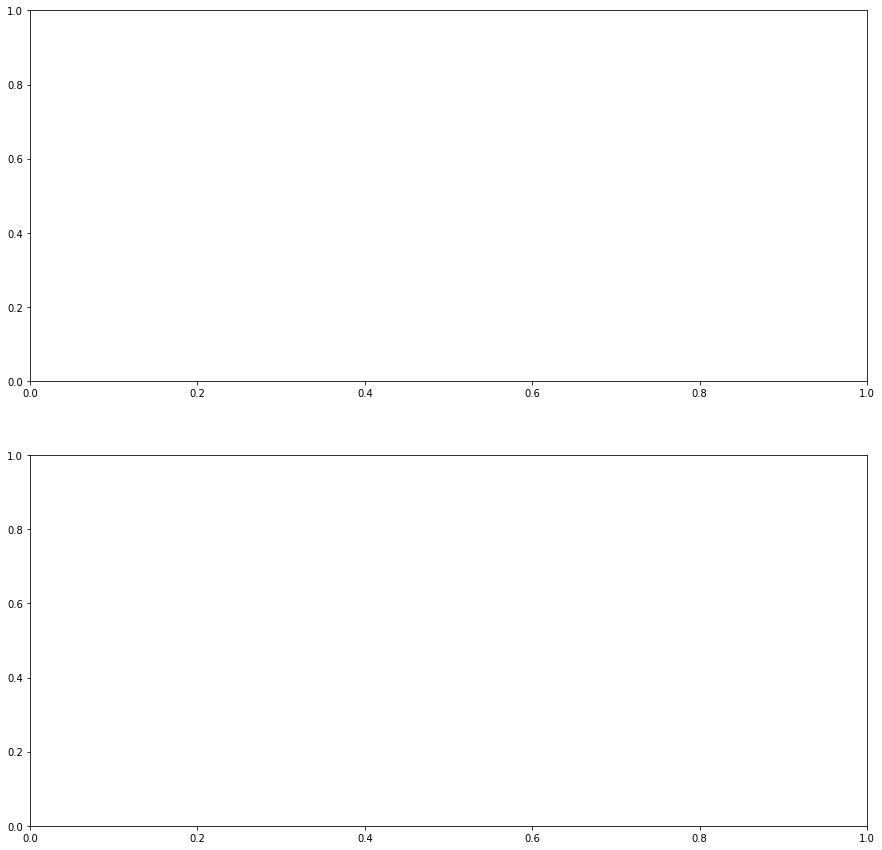

In [24]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])


In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1289 - accuracy: 0.9599


[0.1289190649986267, 0.9599000215530396]

In [ ]:
model.save_weights(".")

In [ ]:
from keras.models import model_from_json

In [ ]:
model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [44]:
# Specify the name of the file for which you want to save the weights to
# in this case, model.h5
model.get_weights()

[array([[[[-0.07393751, -0.1003239 , -0.10044707, -0.02775648,
            0.08857577, -0.0075167 ]],
 
         [[ 0.09176524, -0.15814638, -0.08382069, -0.00443849,
           -0.0958851 ,  0.17811276]],
 
         [[-0.04193091, -0.04094522,  0.10679568,  0.09883957,
           -0.0413183 , -0.05223468]],
 
         [[ 0.00444852, -0.12267441,  0.12557454,  0.13173766,
            0.01341221,  0.04144323]],
 
         [[ 0.07429744,  0.03002843,  0.11414485, -0.10617619,
           -0.08956058, -0.13993302]]],
 
 
        [[[ 0.04220538,  0.1137109 ,  0.08445613, -0.14499839,
           -0.08394182, -0.14690636]],
 
         [[-0.18288562,  0.04005474,  0.09920447, -0.10603262,
            0.17498545, -0.09387828]],
 
         [[-0.02982637,  0.0632997 ,  0.17465974,  0.16480567,
           -0.09158257,  0.134697  ]],
 
         [[-0.02902225,  0.12111323,  0.1179186 ,  0.03151533,
           -0.11960645, -0.10715827]],
 
         [[ 0.03261538, -0.10911366, -0.15579152, -0.17369308

In [ ]:
model.save_weights('./weights')

In [55]:
for layer in model.layers:
    print(layer)
    weights, bias = layer.get_weights()# list of numpy array
    break

In [58]:
print(weights[0])

[[[-0.07393751 -0.1003239  -0.10044707 -0.02775648  0.08857577
   -0.0075167 ]]

 [[ 0.09176524 -0.15814638 -0.08382069 -0.00443849 -0.0958851
    0.17811276]]

 [[-0.04193091 -0.04094522  0.10679568  0.09883957 -0.0413183
   -0.05223468]]

 [[ 0.00444852 -0.12267441  0.12557454  0.13173766  0.01341221
    0.04144323]]

 [[ 0.07429744  0.03002843  0.11414485 -0.10617619 -0.08956058
   -0.13993302]]]


In [57]:
print(bias)

[0. 0. 0. 0. 0. 0.]


array([-0.07393751, -0.1003239 , -0.10044707, -0.02775648,  0.08857577,
       -0.0075167 ,  0.09176524, -0.15814638, -0.08382069, -0.00443849,
       -0.0958851 ,  0.17811276, -0.04193091, -0.04094522,  0.10679568,
        0.09883957, -0.0413183 , -0.05223468,  0.00444852, -0.12267441,
        0.12557454,  0.13173766,  0.01341221,  0.04144323,  0.07429744,
        0.03002843,  0.11414485, -0.10617619, -0.08956058, -0.13993302,
        0.04220538,  0.1137109 ,  0.08445613, -0.14499839, -0.08394182,
       -0.14690636, -0.18288562,  0.04005474,  0.09920447, -0.10603262,
        0.17498545, -0.09387828, -0.02982637,  0.0632997 ,  0.17465974,
        0.16480567, -0.09158257,  0.134697  , -0.02902225,  0.12111323,
        0.1179186 ,  0.03151533, -0.11960645, -0.10715827,  0.03261538,
       -0.10911366, -0.15579152, -0.17369308,  0.00077446, -0.09869176,
       -0.1712893 , -0.0157544 ,  0.10728855, -0.0726755 ,  0.08337025,
        0.00834057, -0.0050776 ,  0.1324011 ,  0.17993854, -0.05

# New Section